In [ ]:
#Using an ARIMA model to project future cost and leads

In [1]:
import pandas as pd

df= pd.read_csv('icims_byday.csv',index_col='Day',parse_dates=True,skiprows=2)

In [2]:
df.head()

,Account,Currency,Conversions,Cost,Search Impr. share,Clicks,Impressions
Day,,,,,,,
2017-07-13,Google - Recruit - Desktop,USD,24.53,8433.04,67.47%,659,"18,556"
2017-07-17,Google - Recruit - Desktop,USD,17.03,6929.43,65.86%,576,"18,266"
2017-08-03,Google - Recruit - Desktop,USD,16.75,7293.85,77.03%,489,"14,594"
2017-08-09,Google - Recruit - Desktop,USD,27.50,7838.70,77.52%,514,"13,550"
2017-10-03,Google - Recruit - Desktop,USD,17.27,13060.14,75.77%,676,"22,289"


In [3]:
#Need to clean data first
df['CPA']=df['Cost']/df['Conversions']
df['CTR']=df['Clicks']/df['Impressions']
df['CPC']=df['Cost']/df['Clicks']

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [22]:
#turning data into stationary time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

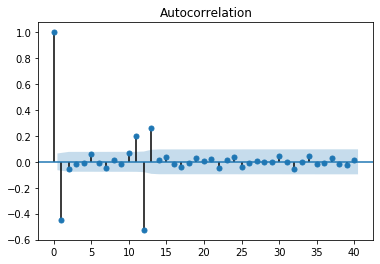

In [23]:
stationary_data = df['Conversions'].diff().diff(periods=12)[13:]
x=plot_acf(stationary_data,lags=40)

In [19]:
#Predicting for Conversions
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Conversions'], order=(2, 1, 1))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Conversions   No. Observations:                  935
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3475.089
Method:                       css-mle   S.D. of innovations              9.916
Date:                Mon, 26 Aug 2019   AIC                           6960.179
Time:                        20:27:27   BIC                           6984.382
Sample:                             1   HQIC                          6969.408
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0018      0.001     -1.376      0.169      -0.004       0.001
ar.L1.D.Conversions     0.0762      0.033      2.330      0.020       0.012       0.140
ar.L2.D.Conversi

In [5]:
results.forecast()

(array([12.99529593]),
 array([9.91613637]),
 array([[-6.43997422, 32.43056609]]))

In [6]:
results.forecast(steps=31)

(array([12.99529593, 13.55636909, 13.63171907, 13.6385586 , 13.63779831,
        13.63612341, 13.63434159, 13.63254715, 13.63075122, 13.62895512,
        13.62715899, 13.62536287, 13.62356674, 13.62177061, 13.61997449,
        13.61817836, 13.61638223, 13.61458611, 13.61278998, 13.61099385,
        13.60919773, 13.6074016 , 13.60560547, 13.60380935, 13.60201322,
        13.60021709, 13.59842097, 13.59662484, 13.59482871, 13.59303259,
        13.59123646]),
 array([9.91613637, 9.94491914, 9.94548573, 9.94549272, 9.94549282,
        9.94549283, 9.94549283, 9.94549283, 9.94549283, 9.94549283,
        9.94549283, 9.94549283, 9.94549283, 9.94549283, 9.94549283,
        9.94549283, 9.94549283, 9.94549283, 9.94549283, 9.94549283,
        9.94549283, 9.94549283, 9.94549283, 9.94549283, 9.94549283,
        9.94549283, 9.94549283, 9.94549283, 9.94549283, 9.94549283,
        9.94549283]),
 array([[-6.43997422, 32.43056609],
        [-5.93531426, 33.04805244],
        [-5.86107477, 33.12451291],
 

In [7]:
results.aic

6960.178969248297

In [8]:
all = results.forecast(steps=31)[0][0:30]

In [9]:
#how many conversions next month
sum(all)

407.8243752965003

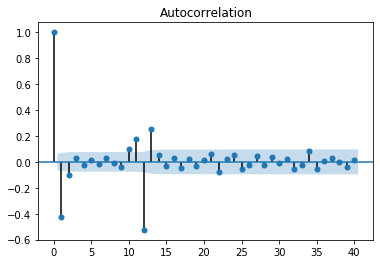

In [20]:
#Predicted for Cost
stationary_data2 = df['Cost'].diff().diff(periods=12)[13:]
x2=plot_acf(stationary_data2,lags=40)

In [11]:
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA

model2 = ARIMA(df['Cost'], order=(2, 1, 1))
results2 = model2.fit()
print(results2.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Cost   No. Observations:                  935
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9077.031
Method:                       css-mle   S.D. of innovations           3966.138
Date:                Mon, 26 Aug 2019   AIC                          18164.062
Time:                        20:26:57   BIC                          18188.265
Sample:                             1   HQIC                         18173.291
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9908      0.521     -1.902      0.057      -2.012       0.030
ar.L1.D.Cost     0.0936      0.033      2.860      0.004       0.029       0.158
ar.L2.D.Cost    -0.0146      0.033     -0.44

In [12]:
results2.forecast()

(array([5259.85098253]),
 array([3966.13804288]),
 array([[-2513.63673924, 13033.3387043 ]]))

In [13]:
results2.forecast(steps=31)

(array([5259.85098253, 5655.29635131, 5628.26770441, 5619.06688034,
        5617.68681936, 5616.77910294, 5615.80170529, 5614.81090758,
        5613.81987046, 5612.82900607, 5611.83816133, 5610.84731592,
        5609.85647016, 5608.86562437, 5607.87477859, 5606.8839328 ,
        5605.89308702, 5604.90224124, 5603.91139545, 5602.92054967,
        5601.92970389, 5600.9388581 , 5599.94801232, 5598.95716654,
        5597.96632076, 5596.97547497, 5595.98462919, 5594.99378341,
        5594.00293762, 5593.01209184, 5592.02124606]),
 array([3966.13804288, 3983.47614236, 3983.54226359, 3983.54931742,
        3983.54932944, 3983.54933183, 3983.54933255, 3983.54933304,
        3983.54933354, 3983.54933403, 3983.54933453, 3983.54933503,
        3983.54933552, 3983.54933602, 3983.54933652, 3983.54933701,
        3983.54933751, 3983.549338  , 3983.5493385 , 3983.549339  ,
        3983.54933949, 3983.54933999, 3983.54934049, 3983.54934098,
        3983.54934148, 3983.54934198, 3983.54934247, 3983.549

In [14]:
results2.aic

18164.06249040481

In [15]:
all2 = results2.forecast(steps=31)[0][0:30]

In [16]:
#how many conversions next month
sum(all2)

167902.71186547188

In [17]:
sum(all2)/sum(all)

411.7034734458961